<a href="https://colab.research.google.com/github/dogukartal/IBM_AI_Labs/blob/main/Introduction%20to%20Neural%20Networks%20and%20PyTorch/Multiple%20Input%20Output%20Linear%20Regression/Multiple_Linear_Regression_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training Linear Regression with Multiple Outputs
---

In [1]:
from torch import nn, optim
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader

import warnings
warnings.filterwarnings("ignore")

In [8]:
def Plot_2D_Plane(model, dataset, n=0):
    w1 = model.state_dict()['linear.weight'].numpy()[0][0]
    w2 = model.state_dict()['linear.weight'].numpy()[0][1]
    b = model.state_dict()['linear.bias'].numpy()

    # Data
    x1 = dataset.x[:, 0].view(-1, 1).numpy()
    x2 = dataset.x[:, 1].view(-1, 1).numpy()
    y = dataset.y.numpy()

    # Make plane
    X, Y = np.meshgrid(np.arange(x1.min(), x1.max(), 0.05), np.arange(x2.min(), x2.max(), 0.05))
    yhat = w1 * X + w2 * Y + b

    # Plotting
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    # ax = fig.gca(projection='3d')

    ax.plot(x1[:, 0], x2[:, 0], y[:, 0],'ro', label='y') # Scatter plot

    ax.plot_surface(X, Y, yhat) # Plane plot

    ax.set_xlabel('x1 ')
    ax.set_ylabel('x2 ')
    ax.set_zlabel('y')
    plt.title('estimated plane iteration:' + str(n))
    ax.legend()

    plt.show()

## Data


In [4]:
class Data2D(Dataset):
    def __init__(self):
        self.x = torch.zeros(20, 2)
        self.x[:, 0] = torch.arange(-1, 1, 0.1)
        self.x[:, 1] = torch.arange(-1, 1, 0.1)
        self.w = torch.tensor([[1.0], [1.0]])
        self.b = 1
        self.f = torch.mm(self.x, self.w) + self.b
        self.y = self.f + 0.1 * torch.randn((self.x.shape[0],1))
        self.len = self.x.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.len

data_set = Data2D()

##Model, Optimizer, and Cost Function

In [5]:
class linear_regression(nn.Module):
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        yhat = self.linear(x)
        return yhat

model = linear_regression(2,1)
print("The parameters: ", list(model.parameters()))

The parameters:  [Parameter containing:
tensor([[ 0.1584, -0.6247]], requires_grad=True), Parameter containing:
tensor([-0.5227], requires_grad=True)]


In [6]:
optimizer = optim.SGD(model.parameters(), lr=0.1)
criterion = nn.MSELoss()
train_loader = DataLoader(dataset=data_set, batch_size=2)

## Train the Model via Mini-Batch Gradient Descent

Before Training: 


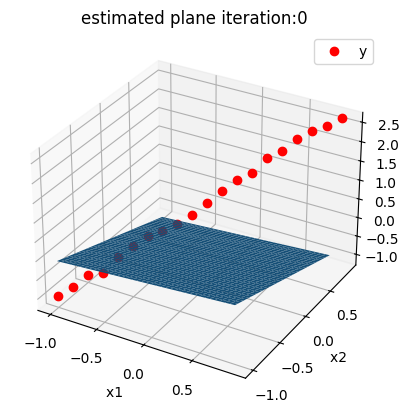

After Training: 


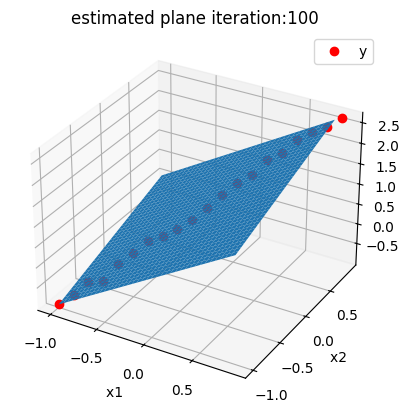

In [9]:
def train_model(epochs):
    for epoch in range(epochs):
        for x,y in train_loader:
            yhat = model(x)
            loss = criterion(yhat, y)
            LOSS.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

LOSS = []
epochs = 100

print("Before Training: ")
Plot_2D_Plane(model, data_set)

train_model(epochs)

print("After Training: ")
Plot_2D_Plane(model, data_set, epochs)

Text(0, 0.5, 'Cost/total loss ')

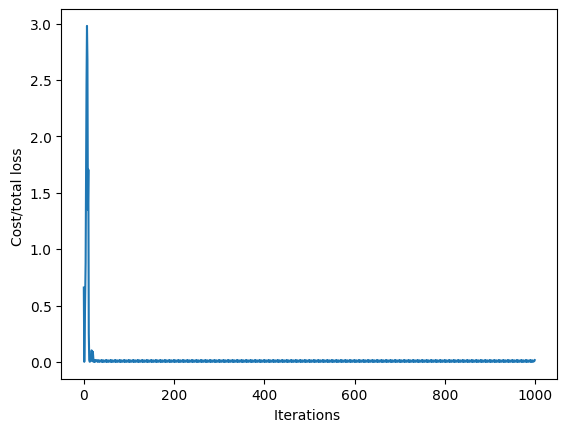

In [10]:
plt.plot(LOSS)
plt.xlabel("Iterations ")
plt.ylabel("Cost/total loss ")